## Практична робота 3_2.

# Customer Shopping Trends Dataset

### About Dataset
#### Context
The Customer Shopping Preferences Dataset offers valuable insights into consumer behavior and purchasing patterns. Understanding customer preferences and trends is critical for businesses to tailor their products, marketing strategies, and overall customer experience. This dataset captures a wide range of customer attributes including age, gender, purchase history, preferred payment methods, frequency of purchases, and more. Analyzing this data can help businesses make informed decisions, optimize product offerings, and enhance customer satisfaction. The dataset stands as a valuable resource for businesses aiming to align their strategies with customer needs and preferences. It's important to note that this dataset is a Synthetic Dataset Created for Beginners to learn more about Data Analysis and Machine Learning.

#### Content
This dataset encompasses various features related to customer shopping preferences, gathering essential information for businesses seeking to enhance their understanding of their customer base. The features include customer age, gender, purchase amount, preferred payment methods, frequency of purchases, and feedback ratings. Additionally, data on the type of items purchased, shopping frequency, preferred shopping seasons, and interactions with promotional offers is included. With a collection of 3900 records, this dataset serves as a foundation for businesses looking to apply data-driven insights for better decision-making and customer-centric strategies.

#### Dataset Glossary (Column-wise)
- Customer ID - Unique identifier for each customer
- Age - Age of the customer
- Gender - Gender of the customer (Male/Female)
- Item Purchased - The item purchased by the customer
- Category - Category of the item purchased
- Purchase Amount (USD) - The amount of the purchase in USD
- Location - Location where the purchase was made
- Size - Size of the purchased item
- Color - Color of the purchased item
- Season - Season during which the purchase was made
- Review Rating - Rating given by the customer for the purchased item
- Subscription Status - Indicates if the customer has a subscription (Yes/No)
- Shipping Type - Type of shipping chosen by the customer
- Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)
- Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)
- Previous Purchases - Number of previous purchases made by the customer
- Payment Method - Customer's most preferred payment method
- Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("shopping_trends.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Розмір датасету:

In [4]:
df.shape

(3900, 19)

Подивимося інформацію про датасет, зокрема на кількість значень в колонках і на типи даних:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Типи даних я вважаю, що відповідають опису даних в колонках. Змінювати нічого не треба.

Також, одразу бачимо, що кількість даних в колонках співпадає із кількістю рядків, що означає, що пропущених значень немає.

Але можемо ще пересвідчитися так:

In [6]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Подивимося, чи є дублікати:

In [7]:
df.duplicated().sum()

0

Відповідь: немає))

Перейменуємо колонки для зручності у стиль snake_case:

In [8]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')

### Переходимо до візуалізації.

In [39]:
# Налаштування стилю Seaborn для всього ноутбука
sns.set(style="whitegrid")
color_palette = sns.color_palette("pastel")

In [48]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [47]:
print(sns.color_palette("pastel").as_hex()) # можливо десь вручну треба буде поставити колір, то дивлюся, щоб теж бути в одній палітрі

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']




1. Гістограма віку (age): 
Побудуйте гістограму віку клієнтів, використовуючи Seaborn. 

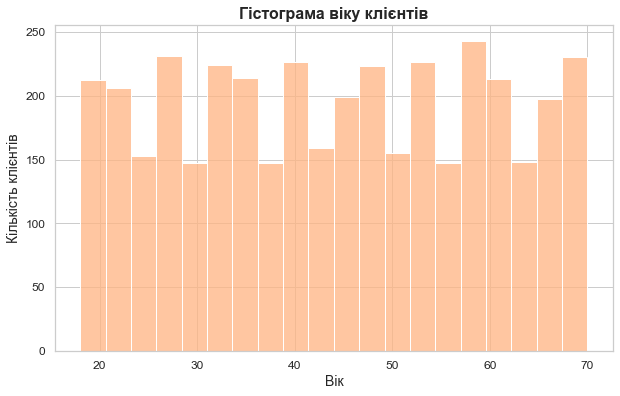

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, color = "#ffb482")
plt.title('Гістограма віку клієнтів', fontsize=16, fontweight = "bold")
plt.xlabel('Вік', fontsize=14)
plt.ylabel('Кількість клієнтів', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 

plt.show()

2. Порівняння розподілу покупок за статтею (item_purchased): 
Створіть стовпчасту діаграму або графік розподілу, щоб порівняти, які товари покупають клієнти найчастіше. 

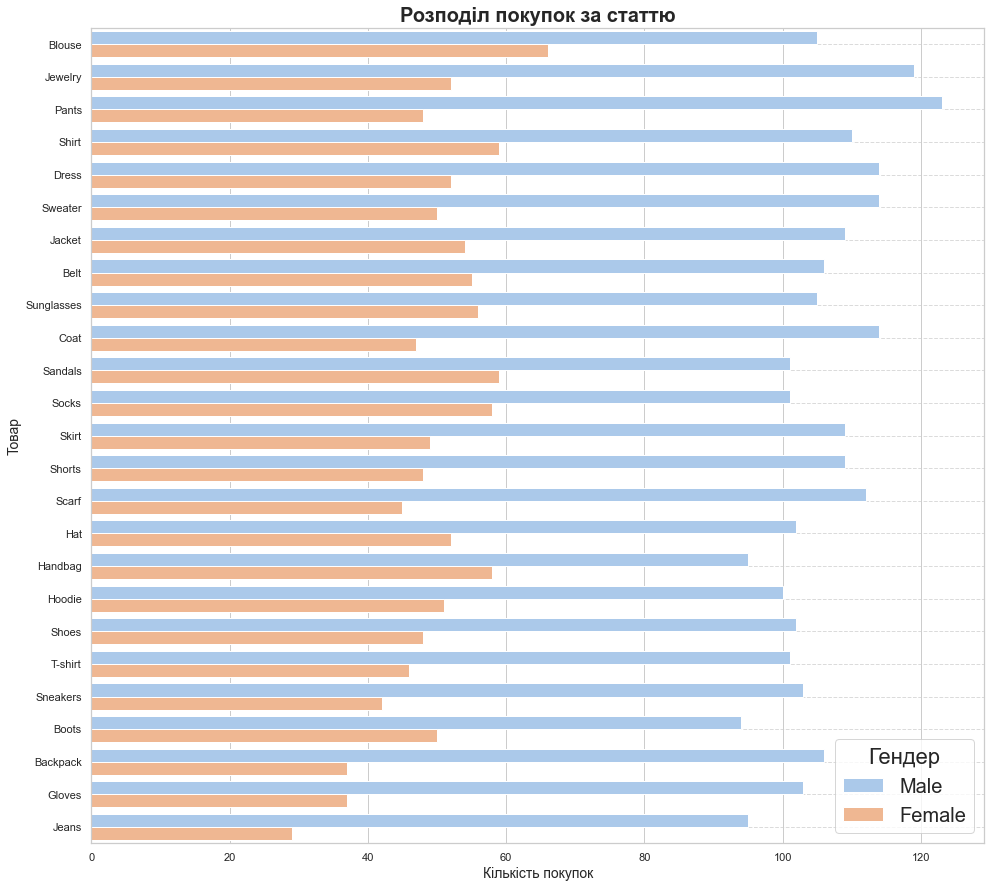

In [62]:
plt.figure(figsize=(16, 15))

sns.countplot(data=df, y='item_purchased', hue='gender', order=df['item_purchased'].value_counts().index, palette=color_palette)
# транспонувала для зручності

plt.title('Розподіл покупок за статтю', fontsize=20, fontweight = "bold")
plt.xlabel('Кількість покупок', fontsize=14)
plt.ylabel('Товар', fontsize=14)
plt.legend(title='Гендер', fontsize=20, title_fontsize=22) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3. Залежність між віком та сумою покупок (purchase_amount): 
Використовуйте scatter plot, щоб візуалізувати залежність між віком та сумою покупок. 

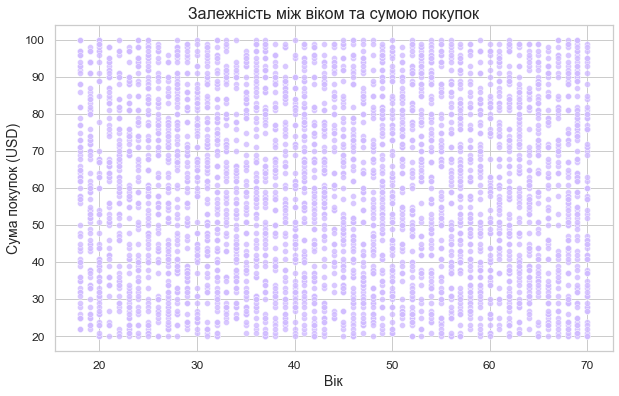

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='purchase_amount_(usd)', alpha=0.8, color="#d0bbff")
plt.title('Залежність між віком та сумою покупок', fontsize=16)
plt.xlabel('Вік', fontsize=14)
plt.ylabel('Сума покупок (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Немає істотної залежності

4. Графік розподілу оцінок товарів (review_rating): 
Побудуйте графік розподілу оцінок товарів для оцінки якості. 

- можемо подивитися статистично розподіл за допомогою boxplot

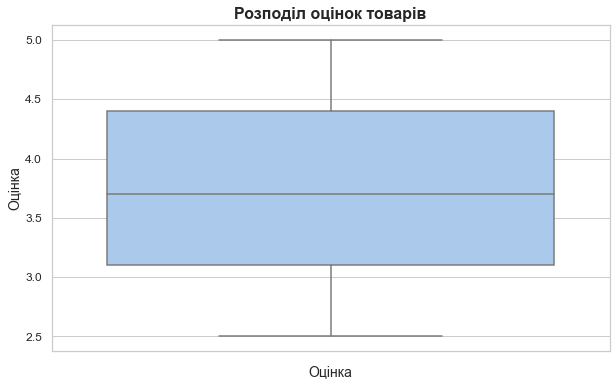

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='review_rating', color="#a1c9f4")
plt.title('Розподіл оцінок товарів', fontsize=16, fontweight="bold")
plt.xlabel('Оцінка', fontsize=14)
plt.ylabel('Оцінка', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

- і можемо подивитися за допомогою гістограми 

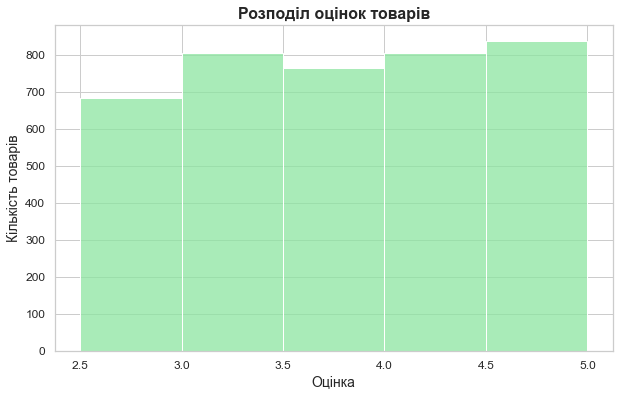

In [134]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_rating', bins=5, color="#8de5a1", kde=False)
plt.title('Розподіл оцінок товарів', fontsize=16, fontweight="bold")
plt.xlabel('Оцінка', fontsize=14)
plt.ylabel('Кількість товарів', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

5. Категоріальна діаграма для статі (gender): 
Створіть категоріальну діаграму, щоб відобразити розподіл покупок за статтею. 

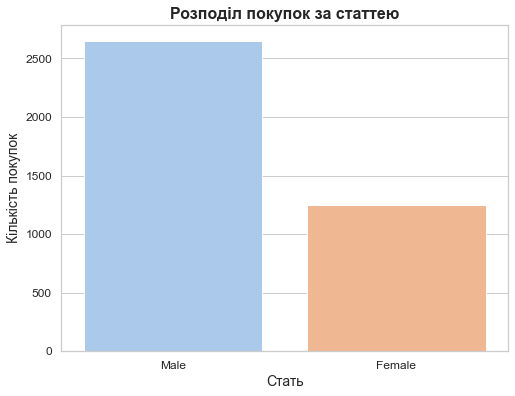

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette= color_palette)
plt.title('Розподіл покупок за статтею', fontsize=16, fontweight="bold")
plt.xlabel('Стать', fontsize=14)
plt.ylabel('Кількість покупок', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Чомусь очікувала, що переважною кількістю покупців будуть жінки, а виявилося навпаки :)

Тим більше, що в основному в товарах одяг.
Підозрюю, що це чоловіки ходять разом з жінками і роблять їм подарунки :))
Або загалом магазин чоловічого одягу. Цікаво.

6. Залежність між рейтингом і сумою покупок (review_rating і purchase_amount): 
Вивчіть, чи існує зв'язок між рейтингом товару і сумою покупок за допомогою scatter plot. 

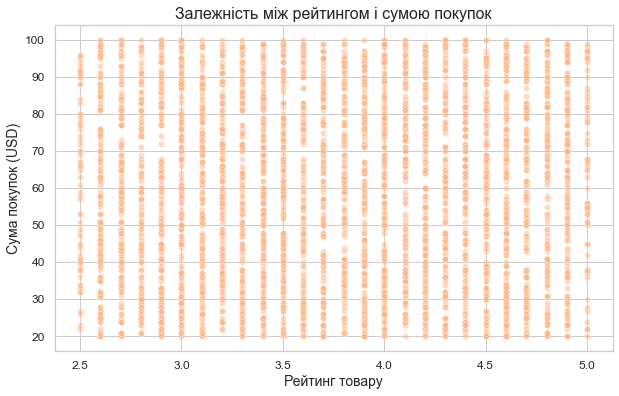

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='review_rating', y='purchase_amount_(usd)', alpha=0.5, color='#ffb482')
plt.title('Залежність між рейтингом і сумою покупок', fontsize=16)
plt.xlabel('Рейтинг товару', fontsize=14)
plt.ylabel('Сума покупок (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

І тут немає прям істотної залежності, що насправді дивно. Але перевіримо матрицю кореляції в 10 завданні)

7. Сезонність покупок (season): 
Побудуйте стовпчату діаграму, яка відображає, в який сезон клієнти роблять найбільше покупок. 

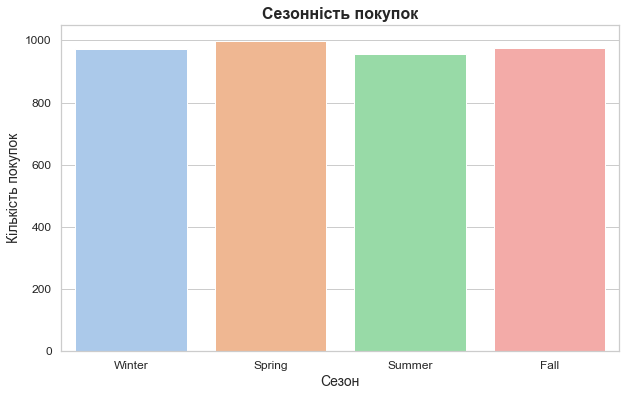

In [135]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='season', palette=color_palette)
plt.title('Сезонність покупок', fontsize=16, fontweight="bold")
plt.xlabel('Сезон', fontsize=14)
plt.ylabel('Кількість покупок', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Висновок: Бачимо, що прям суттєвої різниці немає, А ЦЕ КЛАСНИЙ ПОКАЗНИК ДЛЯ МАГАЗИНУ, 
адже керівництво розуміє і знає, що і коли людям треба, а продавці вміють продавати)

8. Графік розподілу розмірів одягу (size): 
Створіть графік розподілу розмірів одягу, щоб визначити популярність різних розмірів. 

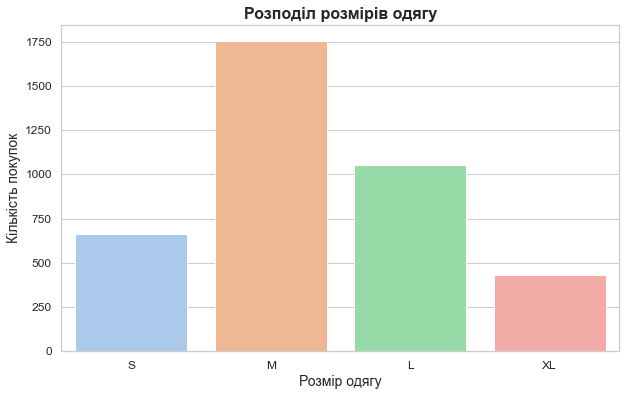

In [87]:
plt.figure(figsize=(10, 6))
# Відсортувала, бо за замовченням вони так не ставали, а хотілося аби було по порядку зростання
order = ['S', 'M', 'L', 'XL']
sns.countplot(data=df, x='size', palette=color_palette, order=order)
plt.title('Розподіл розмірів одягу', fontsize=16, fontweight="bold")
plt.xlabel('Розмір одягу', fontsize=14)
plt.ylabel('Кількість покупок', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Справді, так і є, що більшість людей носять одяг розміру M

9. Кількість покупок відносно типу оплати (payment_method): 
Порівняйте, скільки покупок робиться за різними методами оплати за допомогою стовпчатої діаграми. 

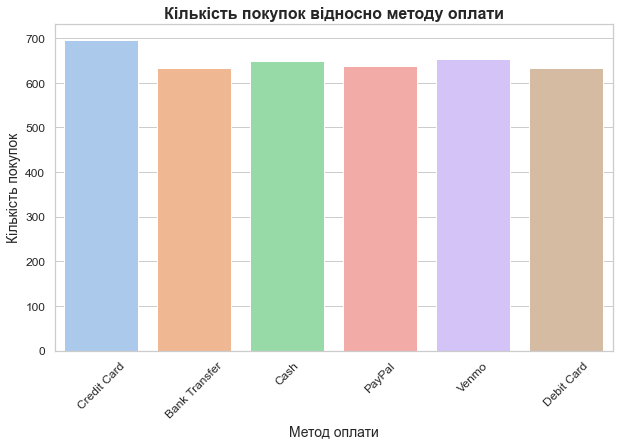

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='payment_method', palette=color_palette)
plt.title('Кількість покупок відносно методу оплати', fontsize=16, fontweight="bold")
plt.xlabel('Метод оплати', fontsize=14)
plt.ylabel('Кількість покупок', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Теж здивована, що переважає не кеш. Але це круто.

10. Залежність між кількістю попередніх покупок (previous_purchases) і сумою поточної покупки (purchase_amount): 

Завдання 1: Створіть scatter plot для визначення, чи існує зв'язок між кількістю попередніх покупок та сумою поточної покупки. 

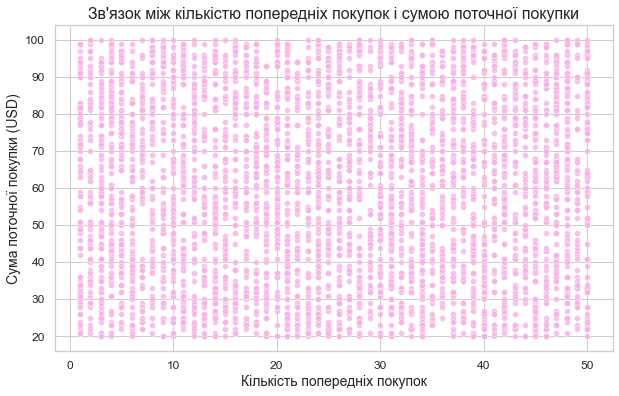

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='previous_purchases', y='purchase_amount_(usd)', alpha=0.8, color='#fab0e4')
plt.title('Зв\'язок між кількістю попередніх покупок і сумою поточної покупки', fontsize=16)
plt.xlabel('Кількість попередніх покупок', fontsize=14)
plt.ylabel('Сума поточної покупки (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Знову немає залежності

Завдання 2:
Побудуйте графік поверхні (3D surface plot) для візуалізації залежності між трьома числовими змінними з використанням бібліотеки Seaborn. 
Налаштуйте відображення графіка, включаючи назву графіку, підписи осей і інші необхідні параметри для кращого розуміння візуалізації. 
Додайте кольорову легенду. 

C:\Users\nasty\AppData\Local\Temp\ipykernel_14476\3561480056.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(surf, shrink=0.9)


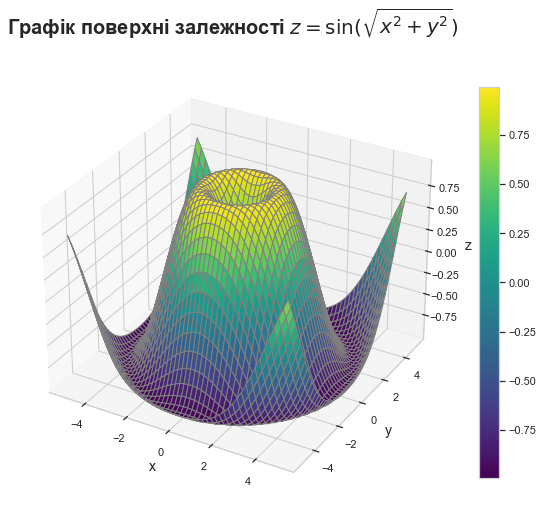

In [136]:
x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, cmap="viridis", edgecolor="grey")

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
plt.title('Графік поверхні залежності $z = \\sin(\\sqrt{x^2 + y^2})$ \n', fontsize=20, fontweight="bold")
cbar = fig.colorbar(surf, shrink=0.9)

plt.show()

Завдання 3: Побудуйте графік теплової поверхні для візуалізації залежності між двома або більше числовими змінними на основі матриці даних, використовуючи бібліотеку Seaborn. 

Опис завдання: 
Згенеруйте дані, які будуть представлені у вигляді матриці. Ця матриця може містить значення залежності між двома або більше числовими змінними. 
Використовуючи бібліотеку Seaborn, побудуйте графік теплової поверхні (heatmap), де кольори відображають значення відповідних елементів матриці. 
Налаштуйте відображення графіку, включаючи назву графіку, підписи осей і інші необхідні параметри для кращого розуміння візуалізації. 

Text(0.5, 1.0, 'Візуалізація залежності в даних')

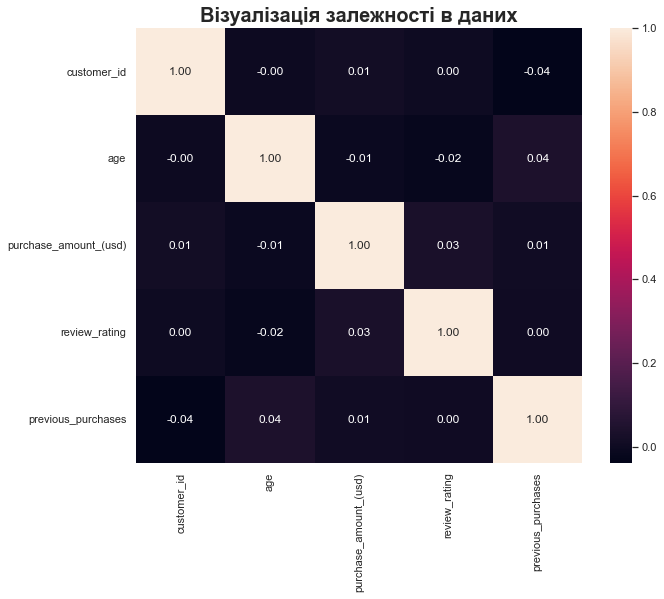

In [110]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Візуалізація залежності в даних', fontsize=20, fontweight="bold")

Вкотре переконалися, що залежності немає, адже майже всюди кореляція менше 0.05, або навіть взагалі 0.